### MODELADO DE LEYES MEDIANTE GEOESTADÍSTICA MULTIVARIABLE A TRAVÉS DE PYTHON
#### Conjunto de datos creados como input para el trabajo de fin de master "Geoestadística Multivariable"

**1. Bibliotecas y recursos:** Utilizados para la creación del dataset, tratamiento de datos y generación de modelos.

In [1]:
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
import scipy.stats                                        # Biblioteca de resumenes estadísticos y matemáticos
plt.style.use('seaborn')                                   # Estilo alternativo de Matplotlib

#NOTA: En base se avance con el codigo, se iran incorporando nuevas bibliotecas.

In [2]:
os.chdir("C:/Users/Heber/Desktop/Tesis2019/Tesis_Python/GSLIB_FOLDER") # ruta de ejecutables de GSLIB

**2. Creación del dataset sintetico a través de simulación estocastica:** Algoritmo de la GSLIB

In [3]:
# Simulación estocástica 2D:
nx = 100; ny = 100; cell_size = 5                        # Número de celdas y tamaño de celdas de la grilla.
xmin = 0.0; ymin = 0.0;                                   # Coordenadas de origen de la grilla.
xmax = xmin + nx * cell_size; ymax = ymin + ny * cell_size # Extensión de la grilla.
seed = 74073                                              # Semilla para generación de números aleatorios en simulación est.   
seed_2 = 74073
range_max = 500; range_min = 200; azimuth = 0           # Rango del variograma 2D y azimut.
range_max_2 = 250; range_min_2 = 50; azimuth_2 = 5
mean = 4.5; stdev = 2                                  # Media y desviación estandar de la variable de interés
mean_2 = 8; stdev_2 = 3
vario = GSLIB.make_variogram(0.0,nst=1,it1=1,cc1=1.0,azi1=azimuth,hmaj1=range_max,hmin1=range_min) # Generación del variograma GSLIB.
vario_2 = GSLIB.make_variogram(0.0,nst=1,it1=1,cc1=1.0,azi1=azimuth_2,hmaj1=range_max_2,hmin1=range_min_2)
vmin = 0; vmax = 15; cmap = plt.cm.jet              # Color mínimo y máximo utilizado en el mapa de colores.

# Calcular una realización estocástica de la variable N° 1:

sim = GSLIB.sgsim_uncond(1,nx,ny,cell_size,seed,vario,'simulation') # 2d simulación incondicional
sim = GSLIB.affine(sim,mean,stdev)                        # Corregir la distribución a una media objetivo y desviación estándar.

# Calcular una realización estocástica de la variable N° 2:

sim_2 = GSLIB.sgsim_uncond(1,nx,ny,cell_size,seed_2,vario_2,'simulation_2') # 2d simulación incondicional
sim_2 = GSLIB.affine(sim_2,mean_2,stdev_2)   

# Extracción de muestras a partir de la simulación:

sampling_ncell = cell_size  # muestras cada "n" número de nodos de la grilla.

samplesx = GSLIB.regular_sample(sim,xmin,xmax,ymin,ymax,sampling_ncell,3.5,3.5,nx,ny,'Realization') #df contenedor de la primera variable

#alternativo: heterotopia parcial en función a la lista.

lista = list(range(0,576,2)) + list(range(0,24,1)) + list(range(48,72,1)) + list(range(96,120,1)) + list(range(144,168,1)) + list(range(192,216,1)) + list(range(240,264,1)) + list(range(288,312,1)) + list(range(336,360,1)) + list(range(384,408,1)) + list(range(432,456,1)) + list(range(480,504,1)) + list(range(528,552,1))

samples_1 = samplesx.drop(lista) #df con muestras eliminadas en función a la lista

samples_2 = GSLIB.regular_sample(sim_2,xmin,xmax,ymin,ymax,sampling_ncell,3.5,3.5,nx,ny,'Realization_2') #df contenedor de la segunda variable

**3. Visualización de la simulación y muestras extraidas como dataset sintentico para el estudio:**

La geoestadística multivariable alcanza mejores resultados cuando existe heterotopía parcial, esto significa que la variable principal (V1), se encuentra sub muestreada en comparación a la variable secundaria (V2).

1. **Heterotopía completa:** Tanto V1 como V2 no comparten ninguna posición en común.
2. **Heterotopía parcial (este caso):** La V1 posee puntos en comun con V2 pero esta submuestreada.
3. **Isotopía:** Tanto V1 como V2 comparten todas sus ubicaciones.

In [4]:
def locmap(df,xcol,ycol,vcol,xmin,xmax,ymin,ymax,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    ixy = 0 
    plt.figure(figsize=(8,6))    
    im = plt.scatter(df[xcol],df[ycol],s=None, c=df[vcol], marker=None, cmap=cmap, norm=None, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(im, orientation = 'vertical',ticks=np.linspace(vmin,vmax,10))
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    plt.show()
    return im

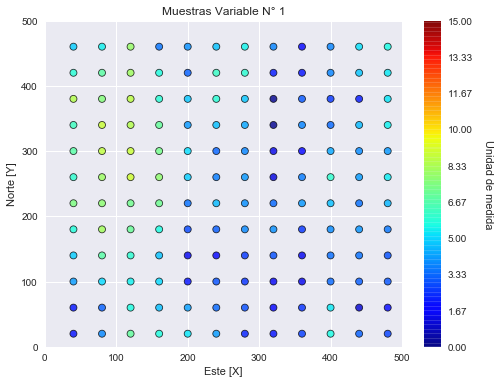

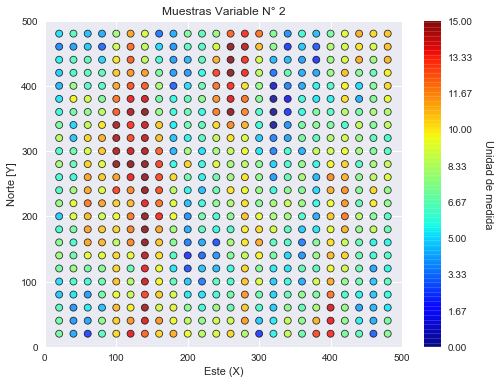

In [5]:
locmap(samples_1,'X','Y','Realization',xmin,xmax,ymin,ymax,0,15,'Muestras Variable N° 1','Este [X]','Norte [Y]','Unidad de medida',cmap)

locmap(samples_2,'X','Y','Realization_2',xmin,xmax,ymin,ymax,0,15,'Muestras Variable N° 2','Este (X)','Norte [Y]','Unidad de medida',cmap)

In [6]:
#Visualización de la simulación estocástica:

#GSLIB.locpix(sim,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,samples_1,'X','Y','Realization','Realizaciones V1 y extracción muestras regulares','Este [X]','Norte [Y]','Variable N° 1 (unidad de medida)',cmap,"var1_muestras")


#GSLIB.locpix(sim_2,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,samples_2,'X','Y','Realization_2','Realizaciones V2 y extracción muestras regulares','Este [X]','Norte [Y]','Variable N° 2 (unidad de medida)',cmap,"var2_muestras")


**4. Tratamiento y gráficos de los DataFrame correspondientes a las muestras extraidas:**

In [7]:
samples_2["V1"] = samples_1['Realization'] #Paso de V1 al df "samples_2", de esta forma las 2 variables estaran unidos en un df por X,Y

#Aquellas ubicaciones de V2 donde no exista V1, será reemplzado por NaN.

samples_2.rename(index=str, columns={"X": "Este [X]", "Y": "Norte [Y]", "Realization_2": "V2"}, inplace=True) #renombre de columnas

print("Media V1:", round(samples_2["V1"].mean(),2), "Desviación Estandar V1:", round(np.sqrt(samples_2["V1"].var()),2)) #media y desviación estandar v1
print("Media V2:", round(samples_2["V2"].mean(),2), "Desviación Estandar V2:", round(np.sqrt(samples_2["V2"].var()),2)) #media y desviación estandar v2

Media V1: 4.48 Desviación Estandar V1: 1.99
Media V2: 8.05 Desviación Estandar V2: 3.07


In [8]:
V1 = samples_2["V1"].count()
V2 = samples_2["V2"].count()
valor = (V1*100)/V2 
print("Heterotopía: ", round(valor,2), "[%]")

Heterotopía:  25.0 [%]


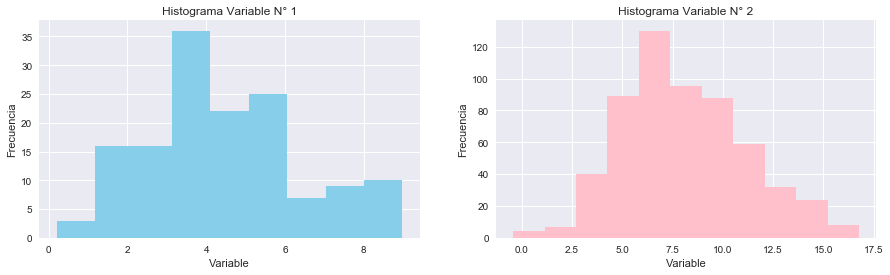

In [9]:
# Figura con 2 histogramas de la variable:

fig = plt.figure(figsize=(15, 4))
# fig.suptitle('HISTOGRAMAS DE LA VARIABLE [Z]')

plot1 = fig.add_subplot(121)

l = samples_2[np.isfinite(samples_2['V1'])] #se filtran los valores NaN

plt.hist(l['V1'], bins="sturges",color='skyblue', histtype='stepfilled',cumulative=False)
plt.grid(False)
plt.xlabel("Variable")
plt.ylabel("Frecuencia")
plt.title("Histograma Variable N° 1")
plt.grid(True)

plot2 = fig.add_subplot(122)
plt.hist(samples_2['V2'], bins="sturges",color='pink', histtype='stepfilled',cumulative=False)
plt.grid(True)
plt.xlabel("Variable")
plt.ylabel("Frecuencia")
plt.title("Histograma Variable N° 2")

plt.show()

In [10]:
x = l["V1"]
y = l["V2"]

#Calculando los coeficientes del ajuste de regresión:

a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio

r = np.corrcoef(x, y) # r = coeficiente de correlación

print("R:", r, "a:", a, "b:", b) # b: pendiente de la recta, a: ordenada en la vertical (Y = bX + a)

R: [[1.         0.72323047]
 [0.72323047 1.        ]] a: 1.0718160375018544 b: 3.205134216448416


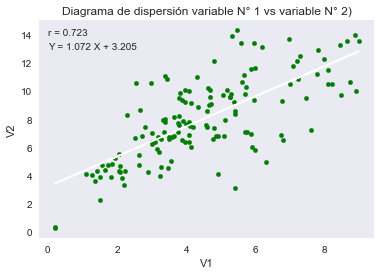

In [11]:
samples_2.plot(kind="scatter", x="V1", y="V2", color="green") #Diagrama de dispersión 2D
plt.plot(x, a * x + b, color="white")
plt.text(0,14, 'r = {0:2.3f}'.format(r[0,1]))
plt.grid(False)
plt.text(0,13, 'Y = {0:2.3f} X + {1:2.3f}'.format(a,b))
plt.title("Diagrama de dispersión variable N° 1 vs variable N° 2)")
plt.show()

In [12]:
v1 = np.array(x) #conversión a una matriz numpy
v2 = np.array(y) #conversión a una matriz numpy
nscore_v1 = GSLIB.nscore(v1) #Transformación a espacio normal
nscore_v2 = GSLIB.nscore(v2) #Transformación a espacio normal

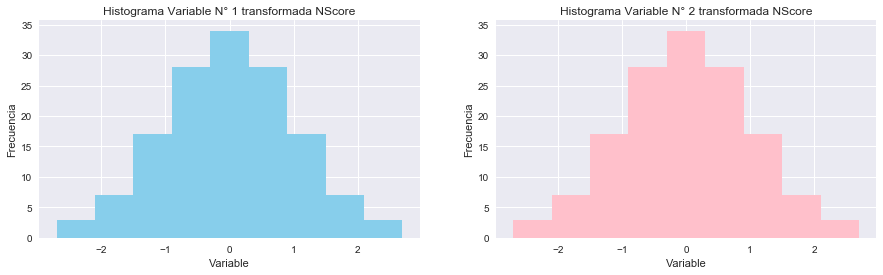

In [13]:
# Figura con 2 histogramas de la variable transformada a distribución normal:

fig = plt.figure(figsize=(15, 4))
# fig.suptitle('HISTOGRAMAS DE LA VARIABLE [Z] transformada')

plot1 = fig.add_subplot(121)

plt.hist(nscore_v1, bins="sturges",color='skyblue', histtype='stepfilled')
plt.grid(False)
plt.xlabel("Variable")
plt.ylabel("Frecuencia")
plt.title("Histograma Variable N° 1 transformada NScore")
plt.grid(True)

plot2 = fig.add_subplot(122)
plt.hist(nscore_v2, bins="sturges",color='pink', histtype='stepfilled',cumulative=False)
plt.grid(True)
plt.xlabel("Variable")
plt.ylabel("Frecuencia")
plt.title("Histograma Variable N° 2 transformada NScore")

plt.show()

In [14]:
samples_2.head() #Tabla de datos con Coordendas X,Y, Variable principal (V1) y secundaria (V2)

,Este [X],Norte [Y],V2,V1
0,20.0,480.0,5.132930,NaN
1,20.0,460.0,3.674564,NaN
2,20.0,440.0,5.437554,NaN
3,20.0,420.0,4.822026,NaN
4,20.0,400.0,4.423310,NaN


In [15]:
V2_nscore = GSLIB.nscore(np.array(samples_2['V2'])) #Transformación a distribución normal de la variable secundaria
V1_nscore = GSLIB.nscore(np.array(samples_2['V1'])) #Transformación a distribución normal de la variable principal

In [16]:
samples_2['V2_nscore'] = V2_nscore #Se agrega la variable transformada (V2) al marco de datos 
samples_2['V1_nscore'] = V1_nscore #Se agrea la variable transformada (V1) al marco de datos.

samples_2.head() #Vista del marco de datos con 6 variables

,Este [X],Norte [Y],V2,V1,V2_nscore,V1_nscore
0,20.0,480.0,5.132930,NaN,-0.95019,-0.95019
1,20.0,460.0,3.674564,NaN,-1.68487,-1.68487
2,20.0,440.0,5.437554,NaN,-0.84597,-0.84597
3,20.0,420.0,4.822026,NaN,-1.02828,-1.02828
4,20.0,400.0,4.423310,NaN,-1.25337,-1.25337


In [17]:
samples_2.V1.fillna(-99, inplace = True) #Se reemplanzan los valores NaN de la columna V1 por -99 para proceder con una operación futura
samples_2['V1_nscore'] = np.where(samples_2.V1 == -99, np.nan, samples_2['V1_nscore']) #Se reemplazan valores de la columna V1_nscore por NaN (los mismos de la V1)
samples_2.V1.replace(-99,np.nan, inplace=True) #Se traen de vuelta los valores NaN a la V1 en vez de valores -99
samples_2.tail() #Vista de las ultimas filas del marco de datos

,Este [X],Norte [Y],V2,V1,V2_nscore,V1_nscore
571,480.0,100.0,6.404594,3.103517,-0.45714,-0.45714
572,480.0,80.0,5.709011,NaN,-0.72169,NaN
573,480.0,60.0,5.242716,1.943831,-0.92320,-0.92320
574,480.0,40.0,7.048170,NaN,-0.21265,NaN
575,480.0,20.0,7.473545,2.811663,-0.05878,-0.05878


**5. Guardar el archivo en formato .csv:** Se guardara un marco de datos con 2 variables refernetes a las coordenadas (X,Y) y 4 variables correspondienes a (V1,V2,V1_nscore,V2_nscore). Se ordenan las columnas ademas.

In [19]:
ax = samples_2['Este [X]'] #X Este
ay = samples_2['Norte [Y]'] #Y Norte
av1 = samples_2['V1'] #Variable N° 1
av2 = samples_2['V2'] #Variable N° 1
nscore_av1 = samples_2['V1_nscore'] #Variable N° 1 transformada
nscore_av2 = samples_2['V2_nscore'] #Variable N° 2 transformada

d = {'Este [X]': ax, 'Norte [Y]': ay, 'Variable 1': av1, 'Variable 2': av2, 'Variable 1T': nscore_av1, 'Variable 2T': nscore_av2} #ordenamiento nuevo de las columnas
df = pd.DataFrame(data=d)
df.to_csv("C:/Users/Heber/Desktop/Tesis2019/" + "muestras_tesis.csv", index=False) #salida del archivo .CSV